In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset/Wine dataset.csv


In [3]:
wine_data=pd.read_csv('/kaggle/input/wine-dataset/Wine dataset.csv')

In [8]:

wine_data.shape

(178, 14)

In [9]:
wine_data.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [10]:
# Check for missing values
missing_values = wine_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


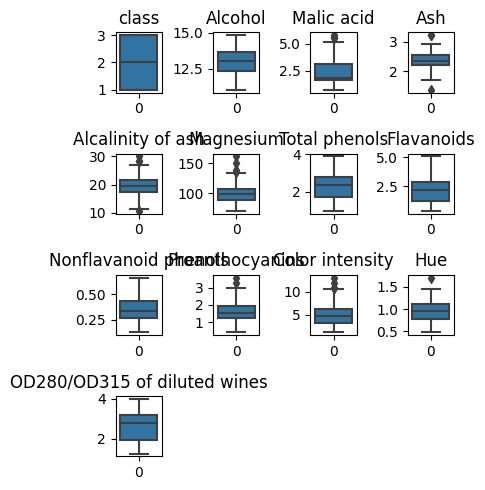

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of each feature with box plots before outlier detection
plt.figure(figsize=(4, 5))
for i, column in enumerate(wine_data.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=wine_data[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [16]:
# 1. Identifying Outliers using IQR method
Q1 = wine_data.quantile(0.25)
Q3 = wine_data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((wine_data < (Q1 - 1.5 * IQR)) | (wine_data > (Q3 + 1.5 * IQR)))
outlier_indices = np.where(outliers.any(axis=1))[0]
wine_filtered = wine_data.drop(outlier_indices)

In [27]:
# Create a table showing the count of instances in each class after outlier detection
quality_counts = wine_filtered['class'].value_counts().sort_index()
print(quality_counts)

class
1    58
2    61
3    42
Name: count, dtype: int64


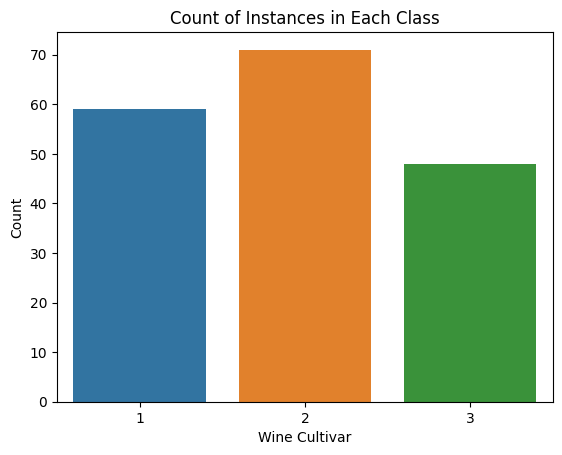

In [14]:
# Visualize the count of instances in each class 
sns.countplot(x='class', data=wine_data)
plt.title('Count of Instances in Each Class')
plt.xlabel('Wine Cultivar')
plt.ylabel('Count')
plt.show()

In [26]:
# Create a table showing the count of instances in each class before outlier detection
all_counts = wine_data['class'].value_counts().sort_index()
print(all_counts)

class
1    59
2    71
3    48
Name: count, dtype: int64


In [17]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = wine_filtered.drop(['class'], axis=1)
y = wine_filtered['class']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

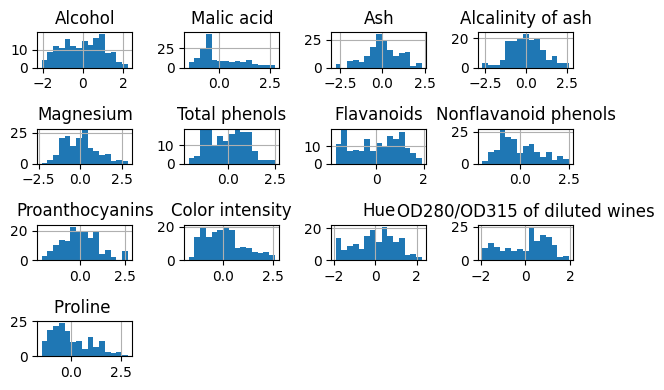

In [20]:
# Visualize the distribution of each feature
X_scaled.hist(bins=15, figsize=(6, 4), layout=(4, 4))
plt.tight_layout()
plt.show()

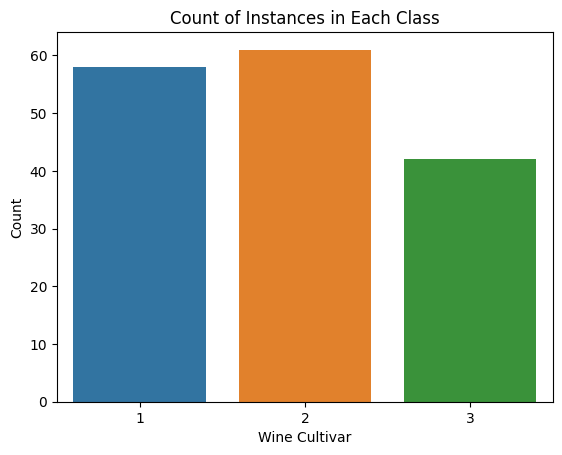

In [36]:
# Visualize the count of instances in each class after cleaned
sns.countplot(x='class', data=wine_filtered)
plt.title('Count of Instances in Each Class')
plt.xlabel('Wine Cultivar')
plt.ylabel('Count')
plt.show()

In [26]:
# Convert to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['class'] = y.reset_index(drop=True)

# Save the scaled data to a CSV file
X_scaled_df.to_csv('wine_scaled.csv', index=False)

# For Jupyter Notebook: Display the download link
from IPython.display import FileLink

# Display the download link
FileLink('wine_scaled.csv')

/kaggle/working/wine_scaled.csv